<a href="https://colab.research.google.com/github/mbabar1100/AIAndMLforTBPresumptiveDetection/blob/main/DiabetesPredictionUsingMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Prediction Using Machine Learning**

This project focuses on performing exploratory data analysis (EDA) and visualizing key relationships within a dataset related to diabetes prediction. The dataset contains information about various health metrics such as age, BMI, HbA1c levels, blood glucose levels, and smoking history, along with other medical conditions like hypertension and heart disease. Through a series of visualizations, including histograms, boxplots, bar charts, and scatter plots, we aim to uncover patterns and correlations between these variables and diabetes prevalence. Additionally, the analysis includes checking for missing data, generating heatmaps, and creating pie charts to represent the distribution of categorical features like gender and smoking history. By understanding these relationships, we can better predict diabetes risk and gain valuable insights into the factors that influence diabetes development. This comprehensive analysis offers a foundation for building predictive models to aid in early diagnosis and prevention strategies.









Step 1: Import Libraries


In [14]:
# Step 1: Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')  # Ignore warnings during model training


Step 2: Load Data
Here, we'll upload your CSV file, read it into a DataFrame, and check for any missing values.

In [15]:
# Step 2: Load Data with File Upload
uploaded = files.upload()

# Load the dataset
df = pd.read_csv(list(uploaded.keys())[0], encoding='ISO-8859-1')

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to understand the dataset
df.head()

# Check for missing values
print(df.isnull().sum())


Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


Step 3: Data Analysis

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

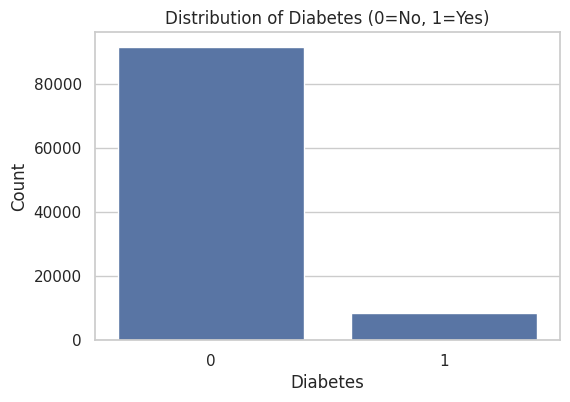

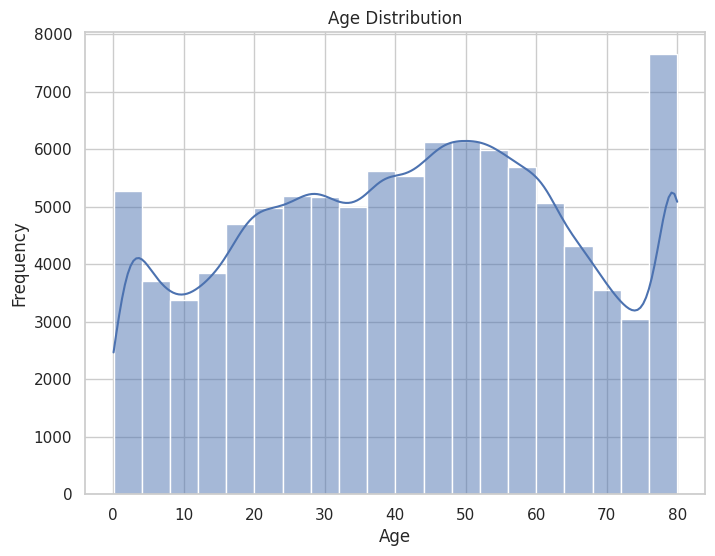

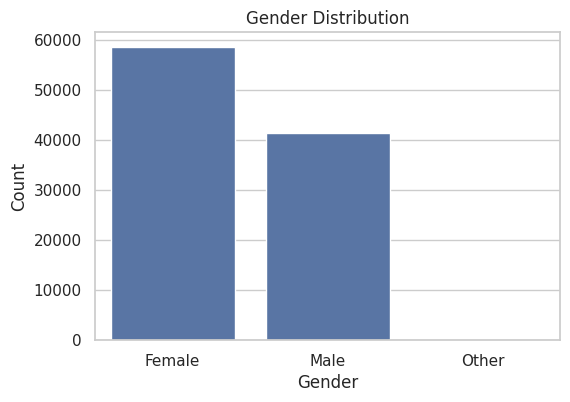

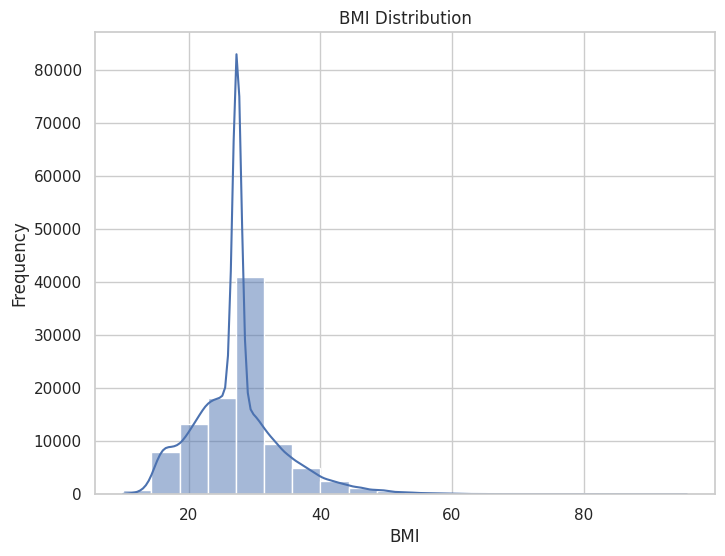

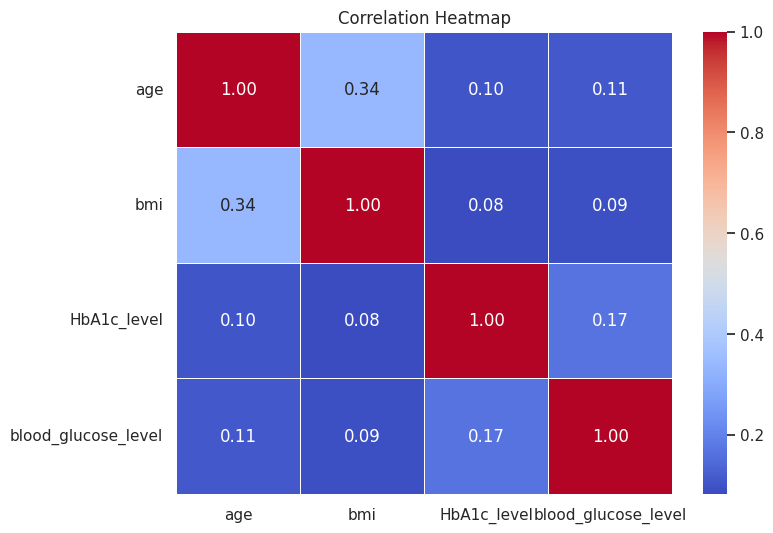

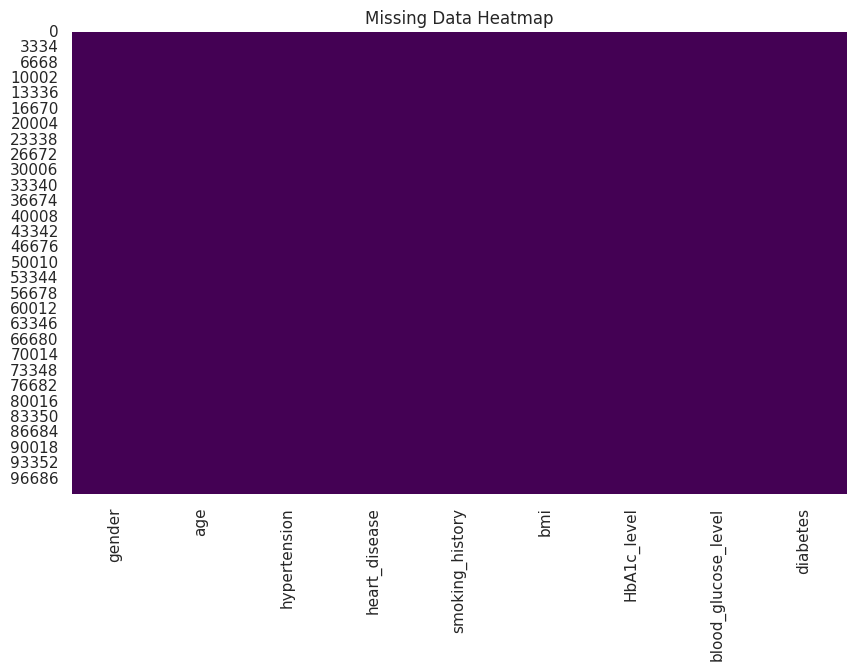

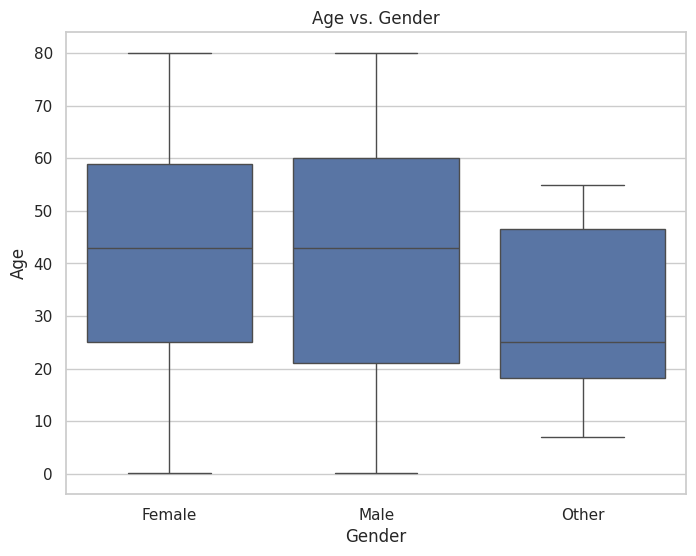

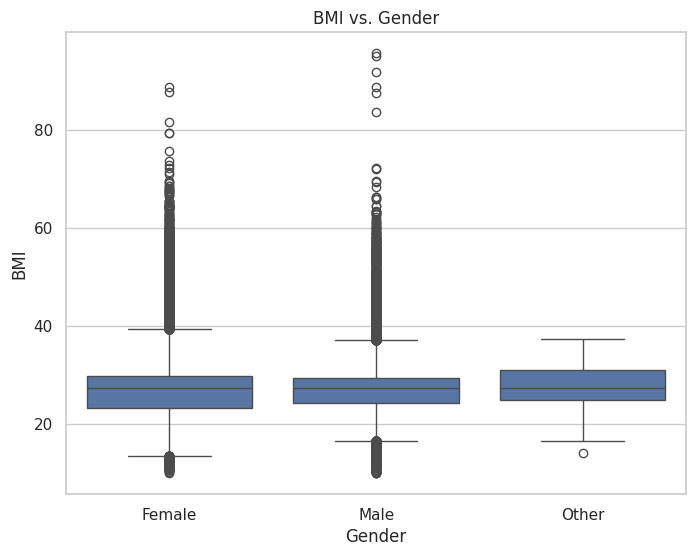

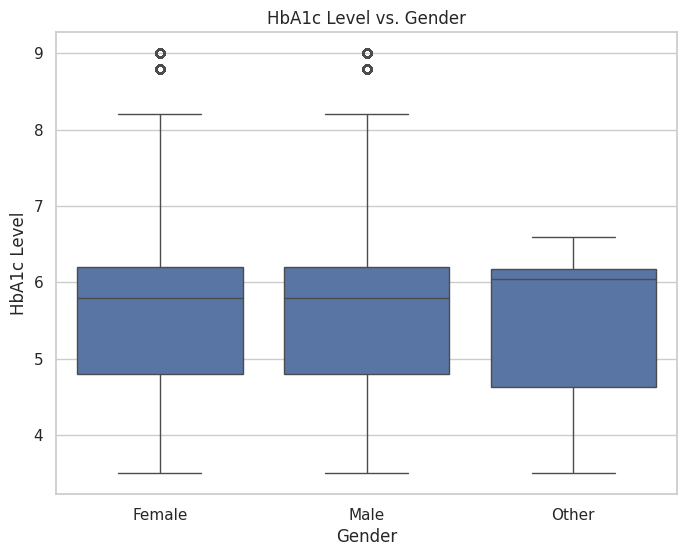

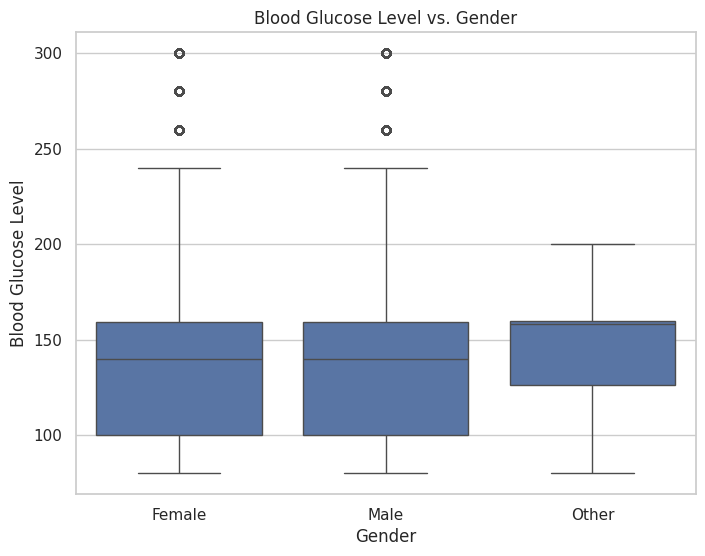

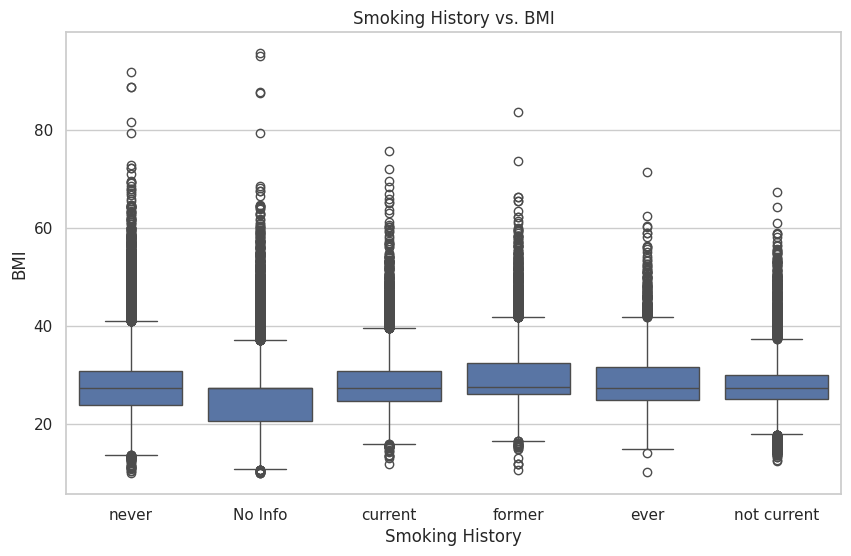

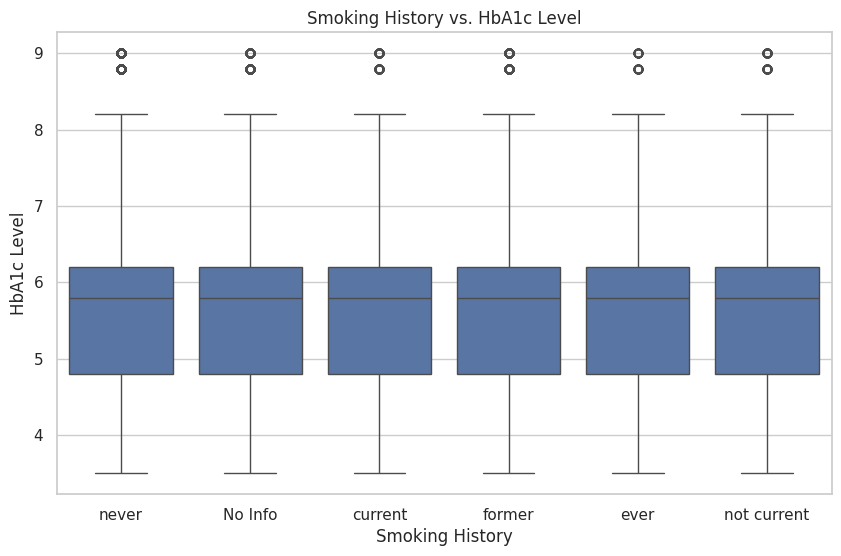

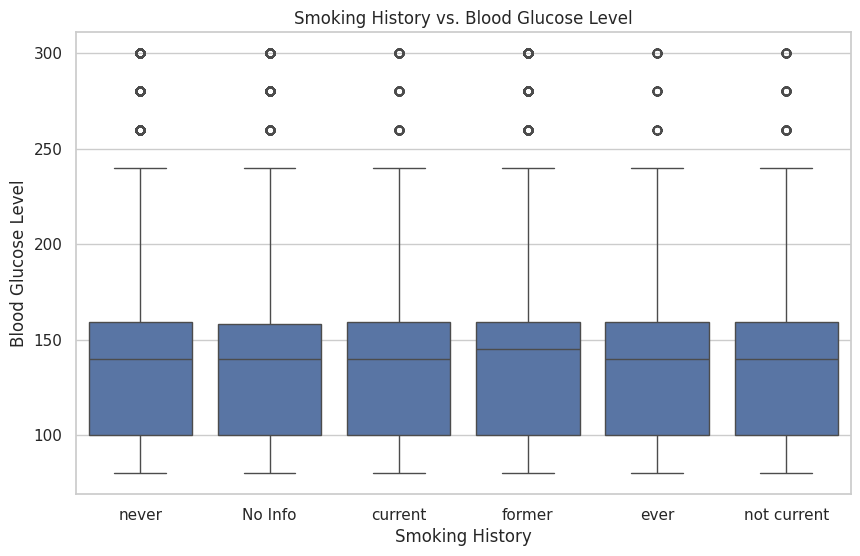

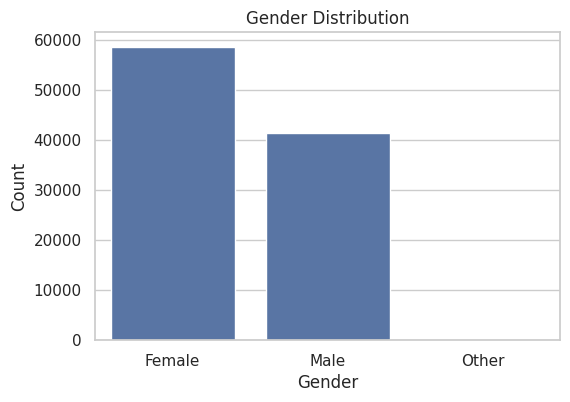

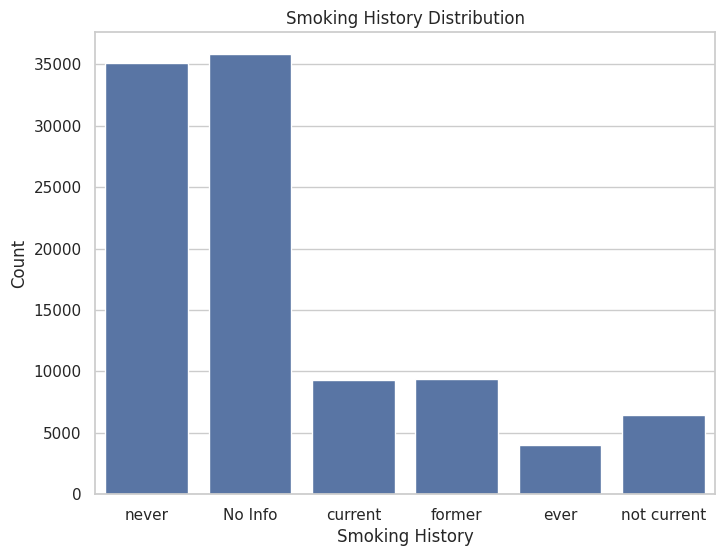

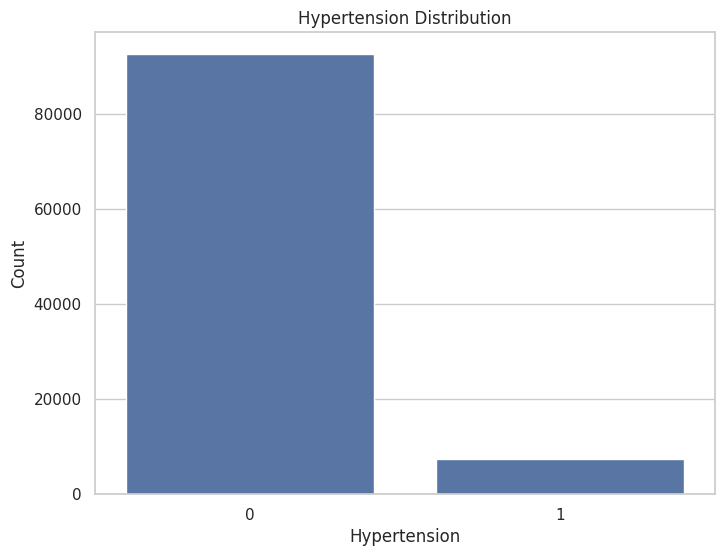

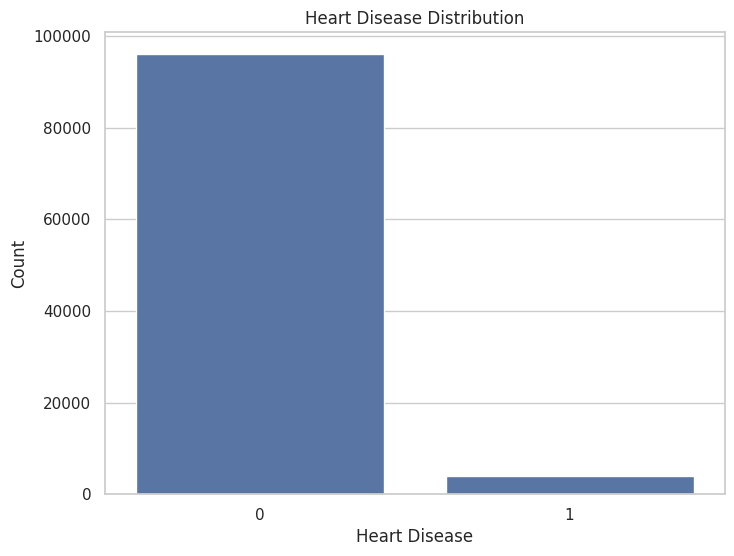

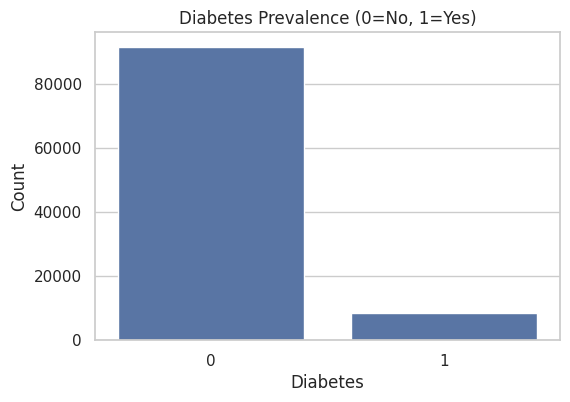

No missing data in the dataset.


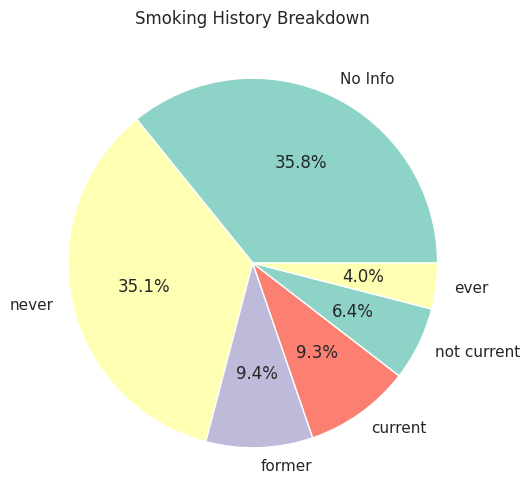

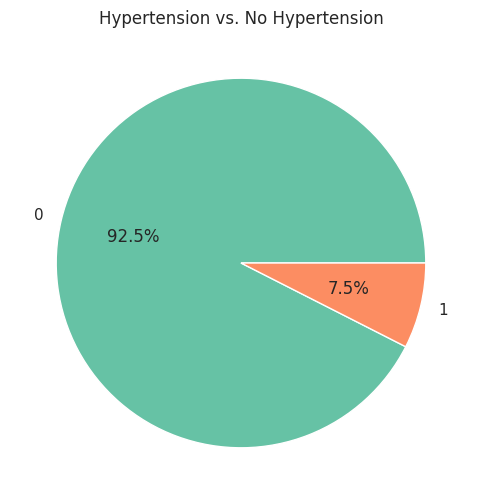

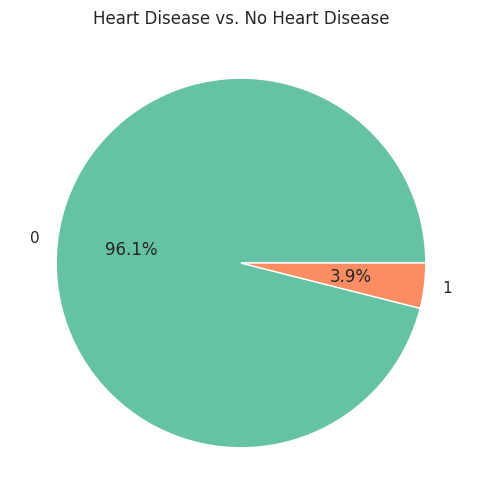

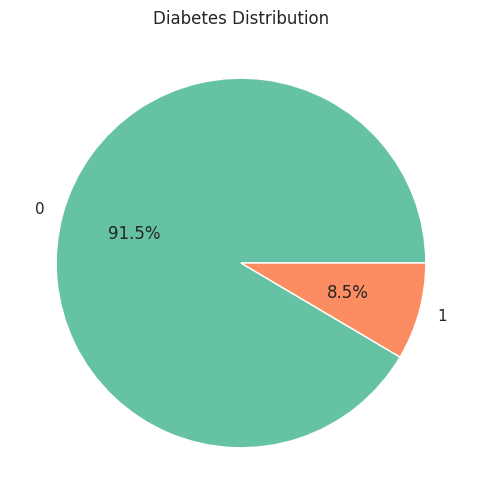

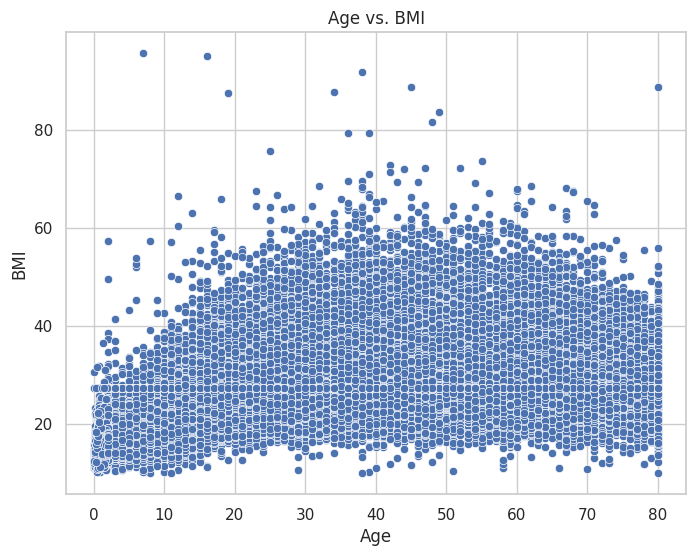

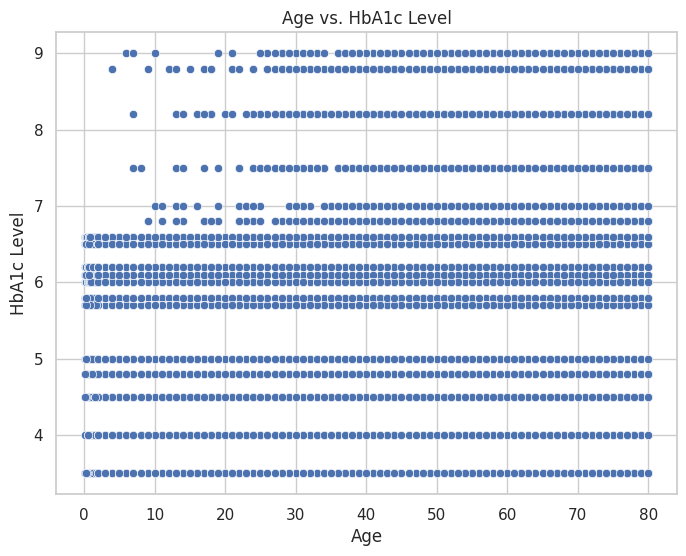

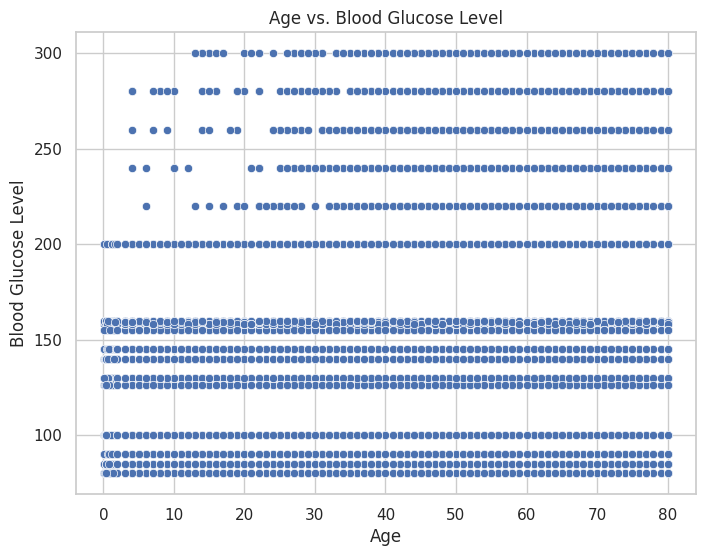

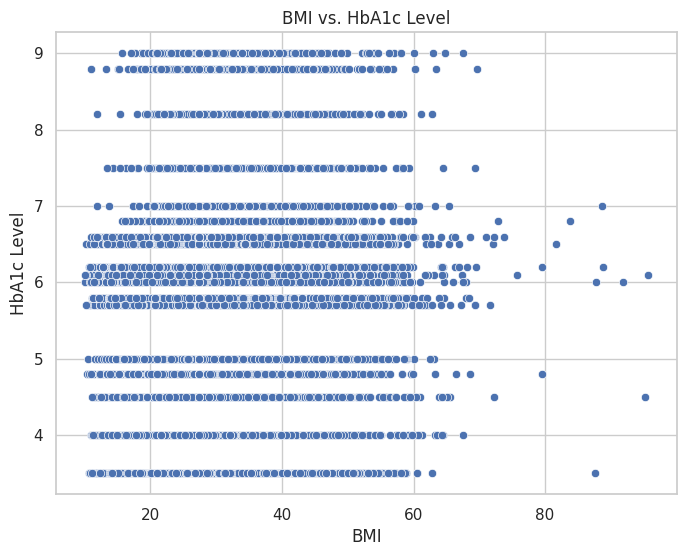

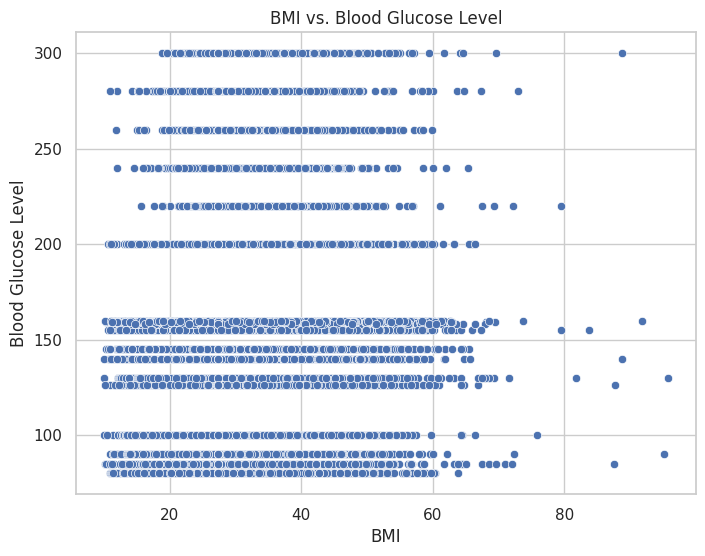

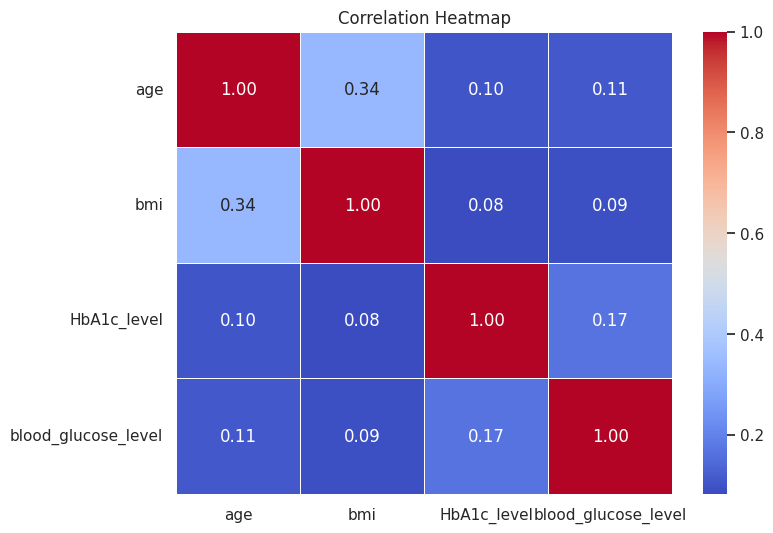

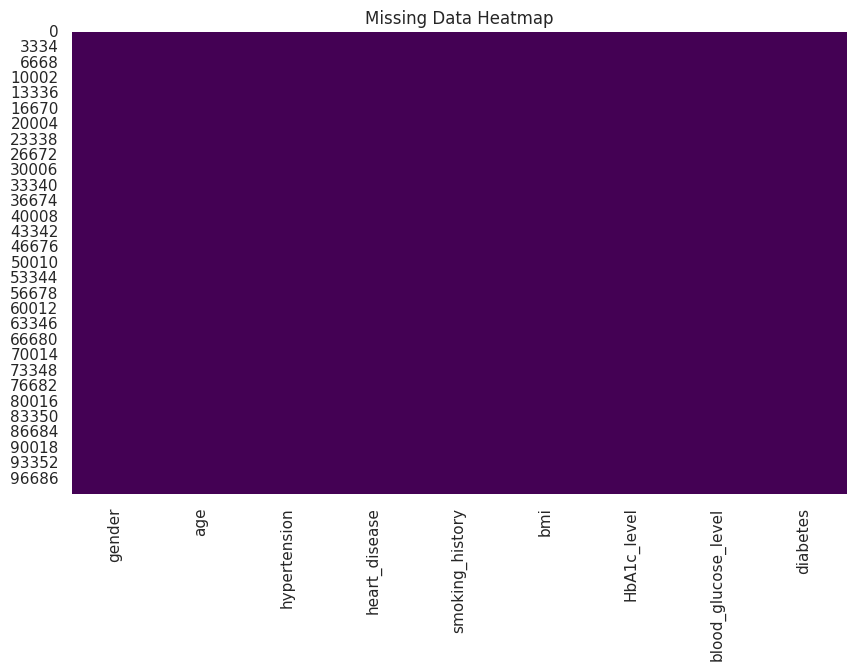

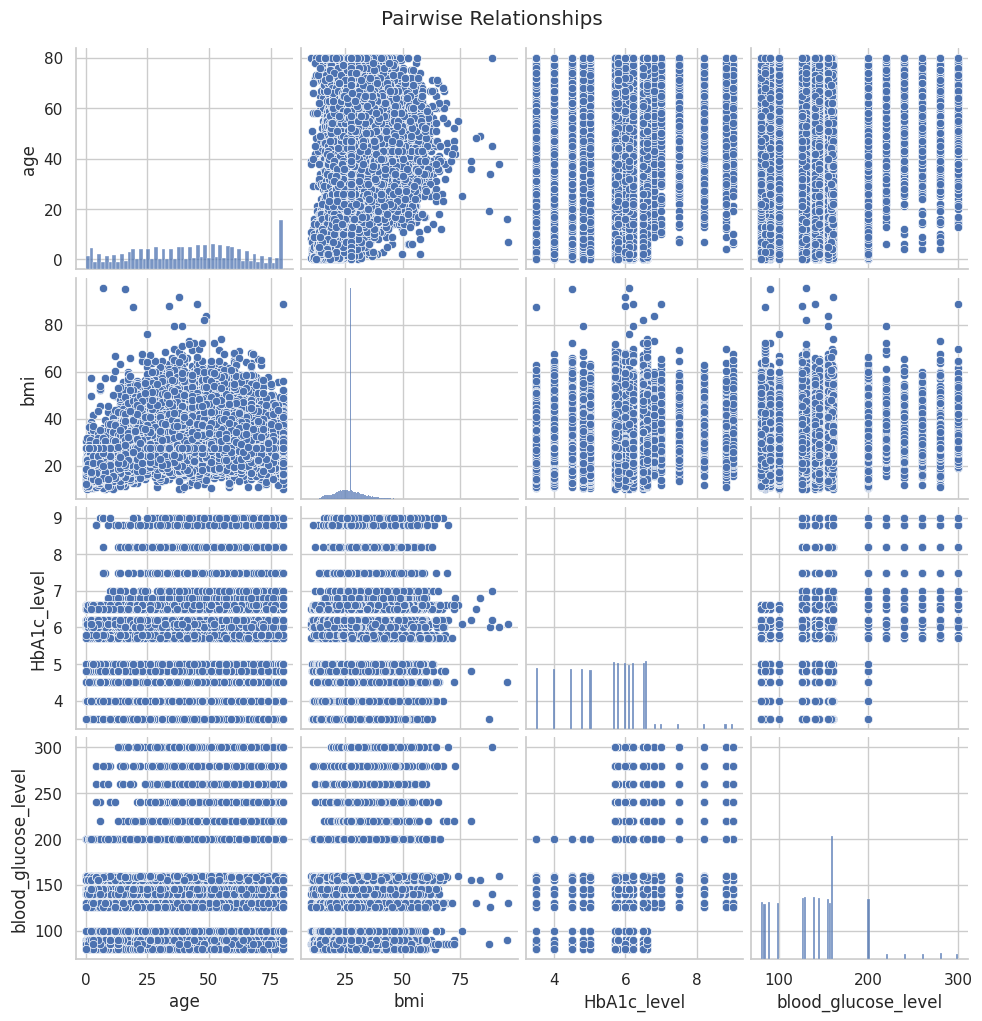

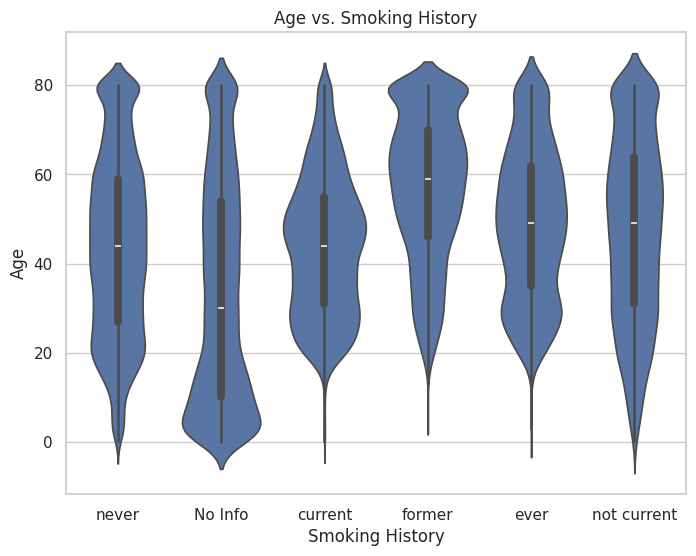

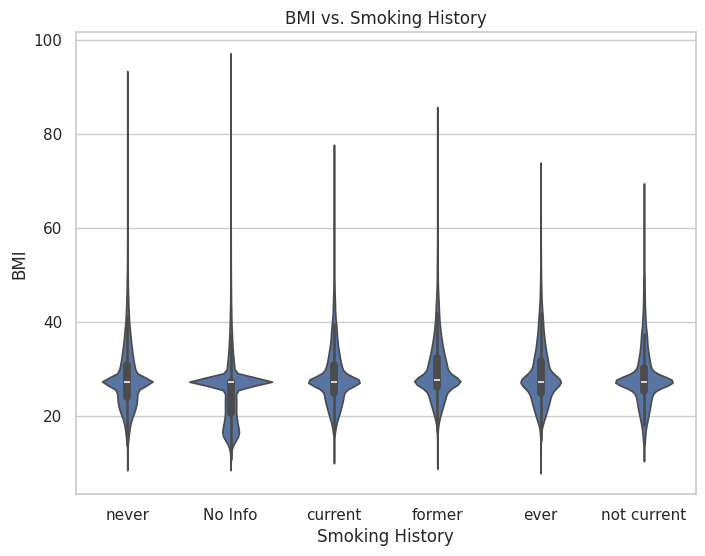

In [17]:
# Step 3: Exploratory Data Analysis (EDA)

# 1. Check basic statistics for numerical columns
print(df.describe())

# 2. Distribution of Target Variable (Diabetes)
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes (0=No, 1=Yes)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# 3. Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 5. BMI distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# 6. Check correlation between numerical variables
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 7. Missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 8. Age vs. Gender (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='age', data=df)
plt.title('Age vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# 9. BMI vs. Gender (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI vs. Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

# 10. HbA1c Level vs. Gender (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='HbA1c_level', data=df)
plt.title('HbA1c Level vs. Gender')
plt.xlabel('Gender')
plt.ylabel('HbA1c Level')
plt.show()

# 11. Blood Glucose Level vs. Gender (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs. Gender')
plt.xlabel('Gender')
plt.ylabel('Blood Glucose Level')
plt.show()

# 12. Smoking History vs. BMI (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='bmi', data=df)
plt.title('Smoking History vs. BMI')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.show()

# 13. Smoking History vs. HbA1c Level (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='HbA1c_level', data=df)
plt.title('Smoking History vs. HbA1c Level')
plt.xlabel('Smoking History')
plt.ylabel('HbA1c Level')
plt.show()

# 14. Smoking History vs. Blood Glucose Level (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='blood_glucose_level', data=df)
plt.title('Smoking History vs. Blood Glucose Level')
plt.xlabel('Smoking History')
plt.ylabel('Blood Glucose Level')
plt.show()

# 15. Gender Distribution (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 16. Smoking History Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

# 17. Hypertension Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# 18. Heart Disease Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# 19. Diabetes Prevalence (Bar Chart)
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Prevalence (0=No, 1=Yes)')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# 20. Missing Data Count (Bar Chart)
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

# Check if there is any missing data before plotting
if not missing_data.empty:
    plt.figure(figsize=(8, 6))
    missing_data.plot(kind='bar', color='orange')
    plt.title('Missing Data Count by Feature')
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.show()
else:
    print("No missing data in the dataset.")

# 21. Smoking History Breakdown (Pie Chart)
plt.figure(figsize=(8, 6))
df['smoking_history'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', 4))
plt.title('Smoking History Breakdown')
plt.ylabel('')
plt.show()

# 22. Hypertension vs. No Hypertension (Pie Chart)
plt.figure(figsize=(6, 6))
df['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', 2))
plt.title('Hypertension vs. No Hypertension')
plt.ylabel('')
plt.show()

# 23. Heart Disease vs. No Heart Disease (Pie Chart)
plt.figure(figsize=(6, 6))
df['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', 2))
plt.title('Heart Disease vs. No Heart Disease')
plt.ylabel('')
plt.show()

# 24. Diabetes Distribution (Pie Chart)
plt.figure(figsize=(6, 6))
df['diabetes'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2', 2))
plt.title('Diabetes Distribution')
plt.ylabel('')
plt.show()

# 25. Age vs. BMI (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bmi', data=df)
plt.title('Age vs. BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

# 26. Age vs. HbA1c Level (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='HbA1c_level', data=df)
plt.title('Age vs. HbA1c Level')
plt.xlabel('Age')
plt.ylabel('HbA1c Level')
plt.show()

# 27. Age vs. Blood Glucose Level (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='blood_glucose_level', data=df)
plt.title('Age vs. Blood Glucose Level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.show()

# 28. BMI vs. HbA1c Level (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='HbA1c_level', data=df)
plt.title('BMI vs. HbA1c Level')
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.show()

# 29. BMI vs. Blood Glucose Level (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='blood_glucose_level', data=df)
plt.title('BMI vs. Blood Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

# 30. Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 31. Missing Data Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 32. Pairwise Relationships (Pairplot)
sns.pairplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

# 33. Violin Plot for Age vs. Smoking History
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoking_history', y='age', data=df)
plt.title('Age vs. Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Age')
plt.show()

# 34. Violin Plot for BMI vs. Smoking History
plt.figure(figsize=(8, 6))
sns.violinplot(x='smoking_history', y='bmi', data=df)
plt.title('BMI vs. Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.show()
